# Wavelet Clustering Analysis on NHDPlus High-Resolution Data

This code provides an example on how to prepare the NHDPlus High-Resolution dataset for use in the Meander Characterization package. The information can be downloaded from the following website: https://www.usgs.gov/core-science-systems/ngp/national-hydrography/nhdplus-high-resolution.

## Extracting NHD Information
### Importing Packages

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

In [1]:
# Importing Packages
import os
import time
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from scipy.spatial.distance import euclidean
import warnings
from xmca.array import MCA  # numpy
from xmca.xarray import xMCA
import xarray as xr

# Importing pyMeander Packages
from WigglyRivers import RiverDatasets as Rivers
from WigglyRivers import RiverFunctions as RF
from WigglyRivers import ExtractNHDPlusHRData as NHD
from WigglyRivers.utilities import utilities as utl
from WigglyRivers.utilities import filesManagement as FM
from WigglyRivers import Logger
from WigglyRivers import WaveletTreeFunctions as WTFunc
from WigglyRivers import graphs

In [ ]:
# Ca

In [3]:
# Example Tutorial
# split data arbitrarily into west and east coast
data = xr.tutorial.open_dataset('air_temperature').air
west = data.sel(lon=slice(200, 260))
east = data.sel(lon=slice(260, 360))


In [15]:
west

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 25)>
[1825000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 252.5 255.0 257.5 260.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [7]:
data

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
[3869000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

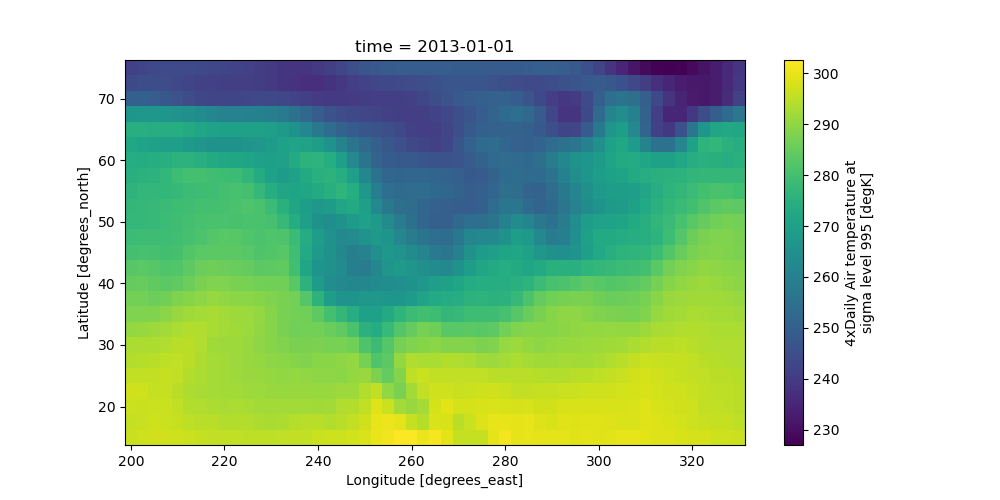

In [14]:
plt.figure(figsize=(10, 5))
data.isel(time=0).plot()
# plt.show()

In [16]:
mca = xMCA(west, east)
mca.solve()

In [18]:
svals = mca.singular_values()
expvar = mca.explained_variance()

eofs  = mca.eofs()
pcs   = mca.pcs()

In [29]:
print(west.shape)
print(svals.shape)
svals

(2920, 25, 25)
(625,)


<xarray.DataArray 'singular values' (mode: 625)>
array([4.41499844e+04, 1.11445032e+03, 8.01430237e+02, 5.35075378e+02,
       4.33652191e+02, 2.69393768e+02, 2.05964493e+02, 1.77367447e+02,
       1.28506989e+02, 1.24609093e+02, 9.05610123e+01, 8.49722977e+01,
       6.82054977e+01, 6.01034431e+01, 5.69599228e+01, 5.50712891e+01,
       4.65203018e+01, 4.37993202e+01, 3.98885536e+01, 3.45457840e+01,
       2.92775421e+01, 2.91312122e+01, 2.53693199e+01, 2.32379818e+01,
       2.31958618e+01, 2.06352043e+01, 2.02649040e+01, 1.81961441e+01,
       1.77210827e+01, 1.67258930e+01, 1.55825062e+01, 1.50025892e+01,
       1.38156767e+01, 1.31938791e+01, 1.26609993e+01, 1.22907333e+01,
       1.12671661e+01, 1.10066776e+01, 1.08866100e+01, 1.04404497e+01,
       9.89578724e+00, 9.04557323e+00, 8.87323570e+00, 8.43527508e+00,
       8.22418308e+00, 7.68843699e+00, 7.47463512e+00, 7.26312113e+00,
       6.89944506e+00, 6.82138395e+00, 6.44186544e+00, 6.13676643e+00,
       5.89473343e+00, 5.76910591e+00, 5.64747334e+00, 5.36949873e+00,
       5.15442085e+00, 4.93076611e+00, 4.86190033e+00, 4.73538017e+00,
       4.30135918e+00, 4.13032246e+00, 4.01001167e+00, 3.82908916e+00,
       3.69566417e+00, 3.68655491e+00, 3.52355528e+00, 3.50312996e+00,
       3.38579249e+00, 3.30460024e+00, 3.17866898e+00, 3.03926563e+00,
       2.89799714e+00, 2.85490298e+00, 2.82160854e+00, 2.64573479e+00,
       2.62034011e+00, 2.55447078e+00, 2.51210356e+00, 2.44818068e+00,
...
       2.10938742e-04, 2.08825411e-04, 2.07396210e-04, 2.03164469e-04,
       2.00921277e-04, 2.00093171e-04, 1.99609683e-04, 1.96658439e-04,
       1.93989792e-04, 1.91723069e-04, 1.90930354e-04, 1.90754916e-04,
       1.87959682e-04, 1.85514713e-04, 1.82733391e-04, 1.81982701e-04,
       1.79877374e-04, 1.78850329e-04, 1.75383757e-04, 1.73694658e-04,
       1.73135326e-04, 1.70293526e-04, 1.68403087e-04, 1.67394610e-04,
       1.64546058e-04, 1.63473305e-04, 1.60993004e-04, 1.58222290e-04,
       1.56641690e-04, 1.55666436e-04, 1.51736502e-04, 1.49914587e-04,
       1.46944265e-04, 1.45562430e-04, 1.45060025e-04, 1.43474943e-04,
       1.41448210e-04, 1.39488213e-04, 1.36703326e-04, 1.32617730e-04,
       1.31792462e-04, 1.28173371e-04, 1.27354971e-04, 1.25898296e-04,
       1.24361148e-04, 1.22777594e-04, 1.21579506e-04, 1.19751101e-04,
       1.18136719e-04, 1.16441654e-04, 1.15375326e-04, 1.14307615e-04,
       1.10722904e-04, 1.07522865e-04, 1.05713567e-04, 1.02728969e-04,
       1.01787758e-04, 9.99953263e-05, 9.79802498e-05, 9.44402709e-05,
       9.14457269e-05, 9.03631299e-05, 8.95188059e-05, 8.69373107e-05,
       8.49872522e-05, 8.12072103e-05, 8.02645445e-05, 7.78443718e-05,
       7.63128046e-05, 7.34670466e-05, 7.08314401e-05, 6.94730916e-05,
       6.78286160e-05, 6.42706364e-05, 6.12115982e-05, 5.88084222e-05,
       5.65617847e-05], dtype=float32)
Coordinates:
  * mode     (mode) int64 1 2 3 4 5 6 7 8 9 ... 618 619 620 621 622 623 624 625
Attributes: (12/16)
    version:                   1.4.2
    is_bivariate:              True
    is_normalized:             False
    is_coslat_corrected:       False
    method:                    mca
    is_complex:                False
    ...                        ...
    power:                     0
    is_truncated:              False
    is_truncated_at:           625
    rank:                      625
    total_covariance:          49165.27
    total_squared_covariance:  1951802900.0

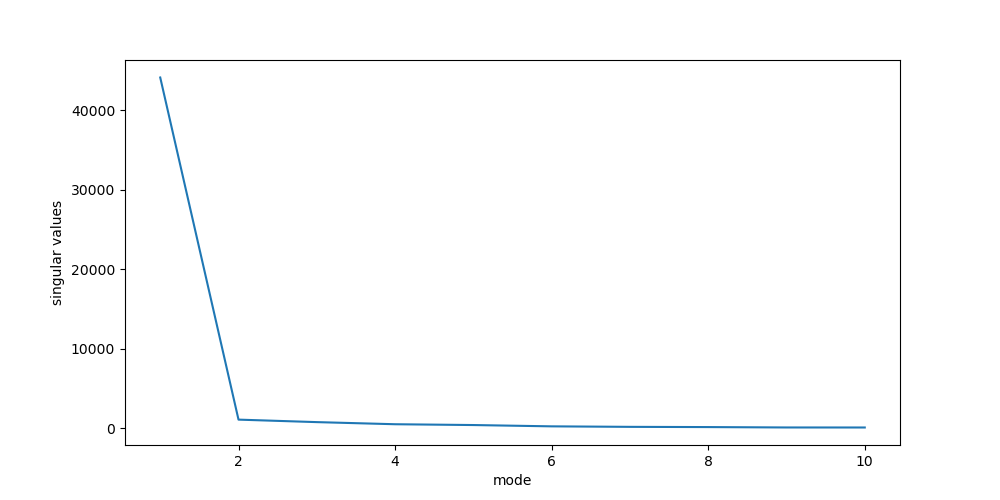

In [31]:
plt.figure(figsize=(10, 5))
svals.isel(mode=slice(0, 10)).plot()
plt.show()

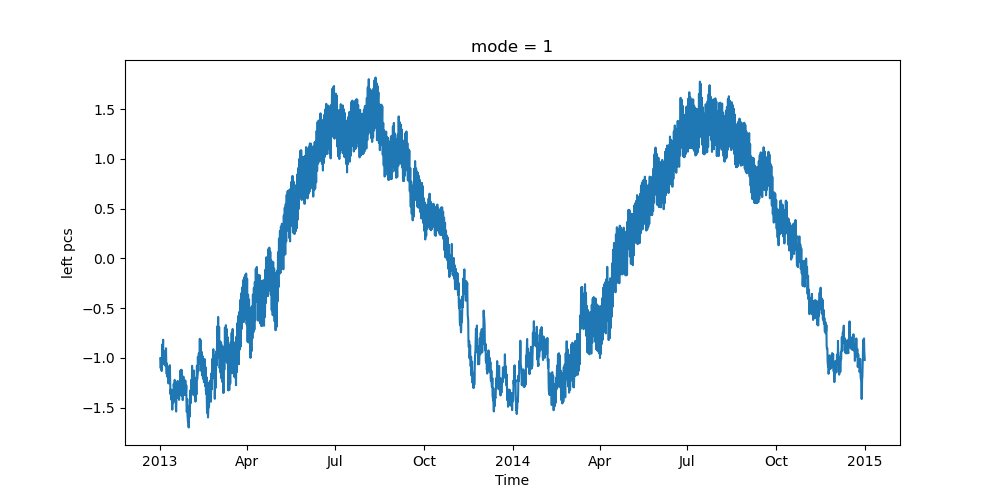

In [34]:
plt.figure(figsize=(10, 5))
pcs['left'].isel(mode=0).plot()
plt.show()